# Content
In this notebook we will perform an exploratory analysis and modeling on a dataset relevant to the automotive industry covering the following points
* Exploratory analysis
  * Loading the dataset and first look
  * Description of the type of information by type of variable and type of data
  * Analysis of outliers for numeric variables
  * Missing values analysis
  * Interaction analysis
  * Response variable analysis
  * Substitution of categorical variables


* Modeling


# Exploratory Analysis

## Loading the dataset and first look

In this section we will load the dataset and take a look at the data structure.

In [ ]:
data_filename = '../input/automobile-dataset/Automobile_data.csv'

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


First thing to highlight is that the dataset contains:
* 26 columns
* Numerical and categorical variables
* There is missing values denoted by '?'.

## Description of the type of information by type of variable and type of data

This section will identify the types of data and types of variables present in the dataset.

### Dataset conditions

In the following list we can see the data types of each of the columns of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

To facilitate data handling, we will divide the dataset in two, one for numeric data (*numeric_df*) and one for object data (*object_df*).

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
object_df = df.select_dtypes(include='object')

In [ ]:
object_df = df.select_dtypes(include='object')

In [ ]:
numeric_df.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [ ]:
object_df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450


When creating the splits we can observe that the variables *normalized-loses*, *bore*, *stroke*, *horsepower*, *peak-rpm* and *price* contain numeric data but are of data type *object*, so it is necessary to do data type conversions.

### Data type conversions for homogeneity

By splitting the dataset by data types, we can see that in *object_df*, which contains **object** types, there are columns (*normalized-loses*, *bore*, *stroke*, *horsepower*, *peak-rpm* and *price*) that are actually numeric. They will be transformed to the correct data type. 

In [ ]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce').astype('Int64')

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce').astype('Int64')

In [ ]:
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce').astype('Int64')

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('Int64')

In [ ]:
df['bore'] = pd.to_numeric(df['bore'], errors='coerce').astype('Float64')

In [ ]:
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce').astype('Float64')

In the same way all int64 and float64 data types will be converted to Int64 and Float64, respectively. This data type supports missing values and will be easier to handle later.

In [ ]:
df[df.select_dtypes(include='int64').columns] = df.select_dtypes(include='int64').astype('Int64')

In [ ]:
df[df.select_dtypes(include='float64').columns] = df.select_dtypes(include='float64').astype('Float64')

Once the conversion is done, the divisions of the dataset by data type are created again.

In [ ]:
numeric_df = df.select_dtypes(include=['Int64', 'Float64'])

In [ ]:
object_df = df.select_dtypes(include='object')

### Data types edentification

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    Float64
 10  length             205 non-null    Float64
 11  width              205 non-null    Float64
 12  height             205 non-null    Float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Once the corresponding conversions have been performed, we can identify that the dataset is made up as follows:

* 26 columns
* 205 records
* Data types **Int64**, **Float64** and **object**.
  * 9 columns of **Int64** type
  * 7 columns of type **Float64** 10 columns of type **object**.
  * 10 columns type **object**.

### Variable types identification

On the other hand, we have divided the database into *object_df* and *numeric_df*, in other words, into **categorical** and **numeric** variable types, respectively.

In [ ]:
object_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


The categorical variables in this data set are divided into:

* **Ordinals**:
  * *Number of doors*.
  * *Number of cylinders
* **Nominals**:
  * *make
  * Fuel type
  * *aspiration
  * Body style
  * drive wheels
  *engine condition
  * engine type
  * fuel system

In [ ]:
numeric_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,<NA>,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,<NA>,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,<NA>,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450


Numerical variables are divided into:

*   **Discretas**:
  * *symboling*
  * *normalized-losses*
  * *curb-weight*
  * *engine-size*
  * *horsepower*
  * *peak-rpm*
  * *city-mpg*
  * *highway-mpg*
  * *price*
*   **Continuas**:
  * *wheel-base*
  * *length*
  * *width*
  * *height*
  * *bore*
  * *stroke*
  * *compression-ratio*




## Analysis of outliers for numeric variables

This section will identify the outliers for each of the numerical variables, specifying the methodology used in each case. The numerical variables are as follows:

In [ ]:
numeric_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,<NA>,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,<NA>,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,<NA>,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450


Two methodologies will be used to detect outliers: depending on the type of data distribution:
1. **Normal distribution**: Data having a value > |3| in the Z-score.

With this method we can be sure that the data are outliers since only 1% of the data are within 3 standard deviations of the mean in this type of distribution.


In [ ]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)        
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

2. **Asymmetric distribution**: Data below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR will be considered outliers. Values that fall outside the range of the 'whiskers' of a boxplot are the outliers identified by this method.
  * Q1: 25th percentile
  * Q3: 75th percentile
  * IQR: Interquartile range

With this method we can be sure that the data points are outliers since only up to 0.7% of the data are outside the range established for this type of distribution.

In [ ]:
def detect_outliers_iqr(data):
    outliers=[]
    q1, q3= np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)         
    for i in data:        
        if((i < lower_bound) | (i > upper_bound)) :
            outliers.append(i)
    return outliers

The methodology to be used will be selected depending on which distribution is most similar (normal and asymmetric) to the distribution of each of the variables.

### symboling

The distribution of the *symboling* variable resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Symboling distribution')]

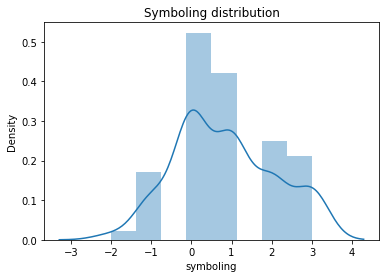

In [ ]:
sns.distplot(df['symboling']).set(title='Symboling distribution')

In [ ]:
outliers=detect_outliers(df['symboling'])

In [ ]:
outliers

[]

According to the methodology used, this variable does not contain outliers.

### normalized-losses

The distribution of the *normalized-losses* variable resembles an **asymmetric distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of normalize-losses')]

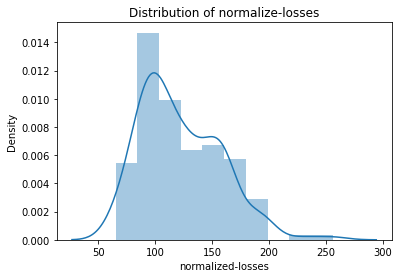

In [ ]:
sns.distplot(df['normalized-losses'].dropna()).set(title='Distribution of normalize-losses')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='normalized-losses'>

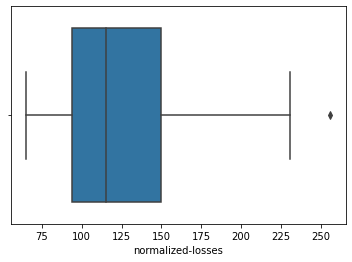

In [ ]:
sns.boxplot(df['normalized-losses'].dropna())

In [ ]:
outliers=detect_outliers_iqr(df['normalized-losses'].dropna())

In [ ]:
outliers

[256]

In [ ]:
len(outliers)

1

In [ ]:
not_outliers = df.loc[~df['normalized-losses'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

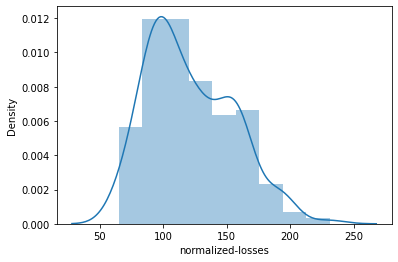

In [ ]:
sns.distplot(not_outliers['normalized-losses'].dropna() )

This variable has 1 outlier and in the graph we can see the distribution without considering the outliers.

### curb-weight

The distribution of the *curb-weight* variable resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Curb-weight distribution')]

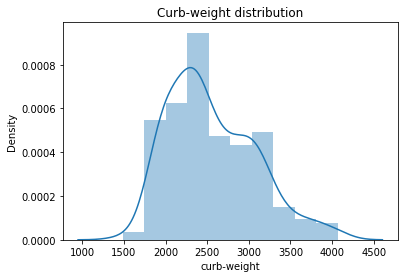

In [ ]:
sns.distplot(df['curb-weight'].dropna()).set(title='Curb-weight distribution')

In [ ]:
outliers=detect_outliers(df['curb-weight'])
outliers

[]

According to the methodology used, this variable does not contain outliers.

### engine-size

The distribution of the *engine-size* variable resembles an **asymmetric distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Engine-size distribution')]

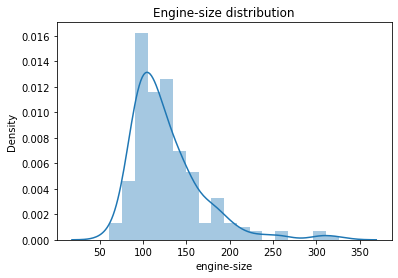

In [ ]:
sns.distplot(df['engine-size'].dropna()).set(title='Engine-size distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='engine-size'>

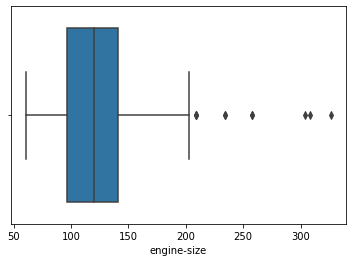

In [ ]:
sns.boxplot(df['engine-size'].dropna())

In [ ]:
outliers=detect_outliers_iqr(df['engine-size'].dropna())

In [ ]:
outliers

[209, 209, 209, 258, 258, 326, 234, 234, 308, 304]

In [ ]:
len(outliers)

10

In [ ]:
not_outliers = df.loc[~df['engine-size'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Engine-size distribution without outliers')]

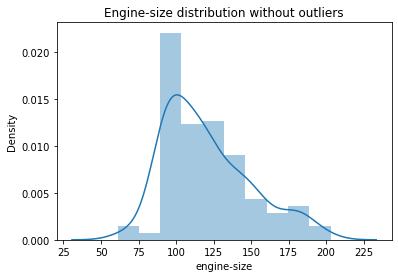

In [ ]:
sns.distplot(not_outliers['engine-size'].dropna()).set(title='Engine-size distribution without outliers')

This variable has 10 outliers and in the graph we can see the distribution without considering the outliers.

### horsepower

The distribution of the *horsepower* variable resembles an **asymmetric distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Horsepower distribution')]

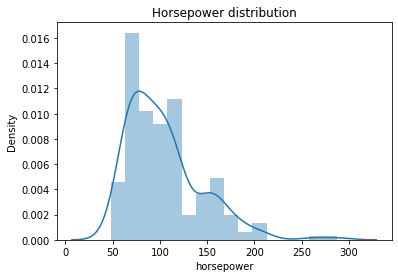

In [ ]:
sns.distplot(df['horsepower'].dropna()).set(title='Horsepower distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='horsepower'>

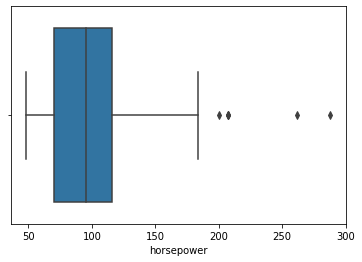

In [ ]:
sns.boxplot(df['horsepower'].dropna())

In [ ]:
outliers=detect_outliers_iqr(df['horsepower'].dropna())

In [ ]:
outliers

[262, 200, 207, 207, 207, 288]

In [ ]:
len(outliers)

6

In [ ]:
not_outliers = df.loc[~df['horsepower'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Horsepower distribution without outliers')]

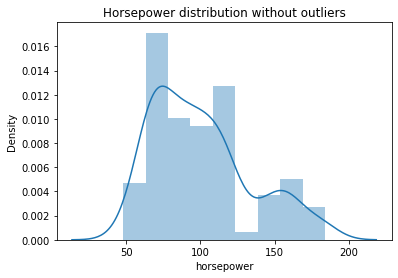

In [ ]:
sns.distplot(not_outliers['horsepower'].dropna()).set(title='Horsepower distribution without outliers')

This variable has 6 outliers and in the graph we can see the distribution without considering the outliers.

### peak-rpm

The distribution of the *peak-rpm* variable resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Peak-rpm distribution')]

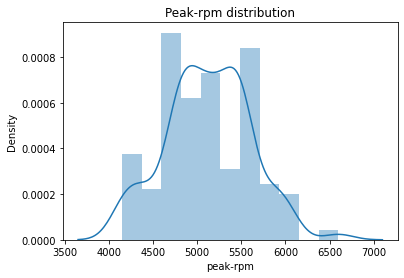

In [ ]:
sns.distplot(df['peak-rpm'].dropna()).set(title='Peak-rpm distribution')

In [ ]:
outliers=detect_outliers(df['peak-rpm'].dropna())
outliers

[6600, 6600]

In [ ]:
len(outliers)

2

In [ ]:
not_outliers = df.loc[~df['peak-rpm'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Peak-rpm distribution without outliers')]

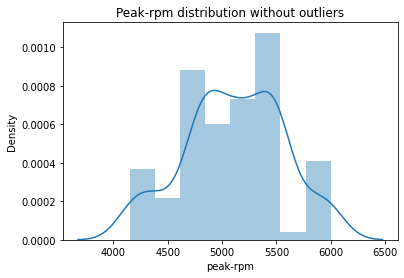

In [ ]:
sns.distplot(not_outliers['peak-rpm'].dropna()).set(title='Peak-rpm distribution without outliers')

This variable has 2 outliers and in the graph we can see the distribution without considering the outliers.

### city-mpg

The distribution of the *peak-rpm* variable resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'City-mpg distribution')]

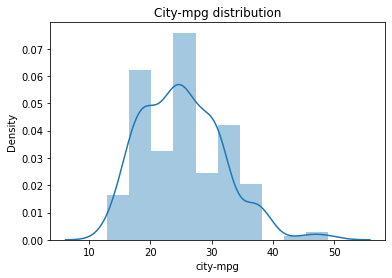

In [ ]:
sns.distplot(df['city-mpg'].dropna()).set(title='City-mpg distribution')

In [ ]:
outliers=detect_outliers(df['city-mpg'].dropna())
outliers

[47, 49, 45]

In [ ]:
len(outliers)

3

In [ ]:
not_outliers = df.loc[~df['city-mpg'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'City-mpg distribution without outliers')]

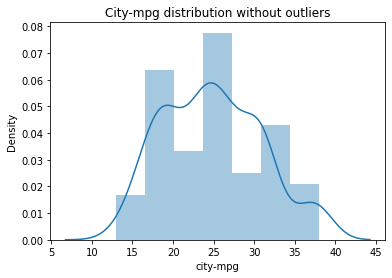

In [ ]:
sns.distplot(not_outliers['city-mpg'].dropna()).set(title='City-mpg distribution without outliers')

This variable has 3 outliers and in the graph we can see the distribution without considering the outliers.

### highway-mpg

The distribution of the *highway-mpg* variable resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Highway-mpg distribution')]

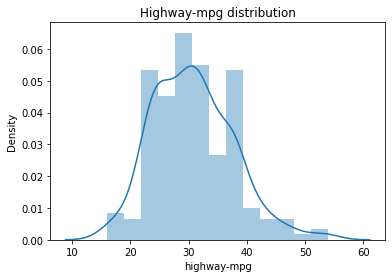

In [ ]:
sns.distplot(df['highway-mpg'].dropna()).set(title='Highway-mpg distribution')

In [ ]:
outliers=detect_outliers(df['highway-mpg'].dropna())
outliers

[53, 54]

In [ ]:
len(outliers)

2

In [ ]:
not_outliers = df.loc[~df['highway-mpg'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Highway-mpg distribution without outliers')]

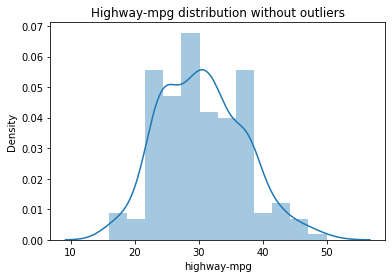

In [ ]:
sns.distplot(not_outliers['highway-mpg'].dropna()).set(title='Highway-mpg distribution without outliers')

This variable has 2 outliers and in the graph we can see the distribution without considering the outliers.

### price

The distribution of the *engine-size* variable resembles an **asymmetric distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Price distribution')]

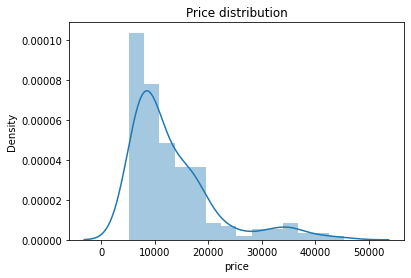

In [ ]:
sns.distplot(df['price'].dropna()).set(title='Price distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

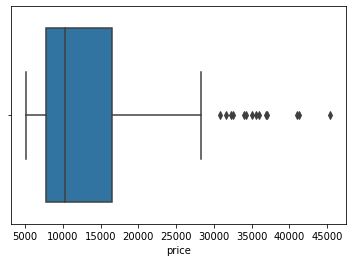

In [ ]:
sns.boxplot(df['price'].dropna())

In [ ]:
outliers=detect_outliers_iqr(df['price'].dropna())

In [ ]:
outliers

[30760,
 41315,
 36880,
 32250,
 35550,
 36000,
 31600,
 34184,
 35056,
 40960,
 45400,
 32528,
 34028,
 37028]

In [ ]:
len(outliers)

14

In [ ]:
not_outliers = df.loc[~df['price'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Price distribution without outliers')]

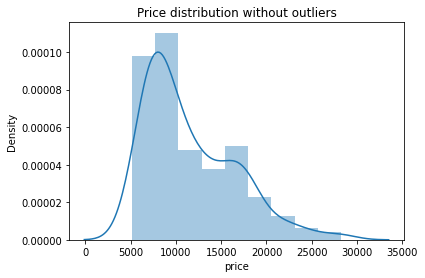

In [ ]:
sns.distplot(not_outliers['price'].dropna()).set(title='Price distribution without outliers')

This variable has 14 outliers and in the graph we can see the distribution without considering the outliers.

### wheel-base

The distribution of the *wheel-base* variable resembles an **asymmetric distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Wheel-base distribution')]

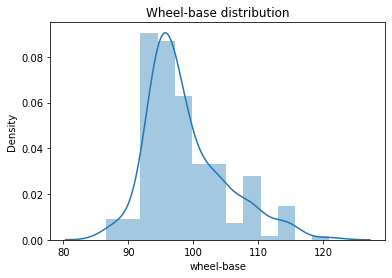

In [ ]:
 sns.distplot(df['wheel-base'].dropna()).set(title='Wheel-base distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='wheel-base'>

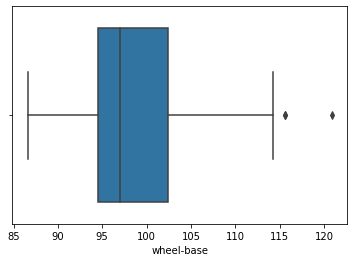

In [ ]:
 sns.boxplot(df['wheel-base'].dropna())

In [ ]:
outliers=detect_outliers_iqr(df['wheel-base'].dropna())

In [ ]:
outliers

[115.6, 115.6, 120.9]

In [ ]:
len(outliers)

3

In [ ]:
not_outliers = df.loc[~df['wheel-base'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Wheel-base distribution without outliers')]

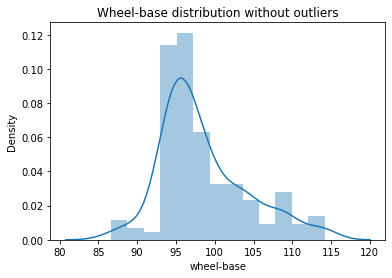

In [ ]:
sns.distplot(not_outliers['wheel-base'].dropna()).set(title='Wheel-base distribution without outliers')

This variable has 3 outliers and in the graph we can see the distribution without considering the outliers.

### length

The distribution of the variable *length* resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Lenght distribution')]

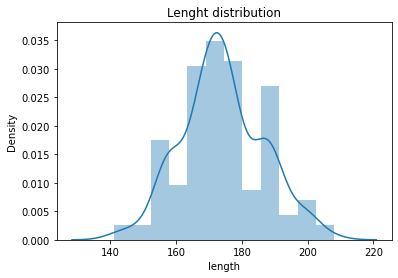

In [ ]:
 sns.distplot(df['length'].dropna()).set(title='Lenght distribution')

In [ ]:
outliers=detect_outliers(df['length'].dropna())
outliers

[]

In [ ]:
len(outliers)

0

According to the methodology used, this variable does not contain outliers.

### width

The distribution of the *width* variable resembles an **asymmetric distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Width distribution')]

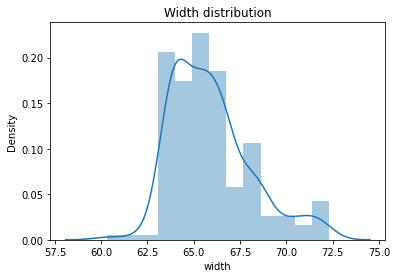

In [ ]:
 sns.distplot(df['width'].dropna()).set(title='Width distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='width'>

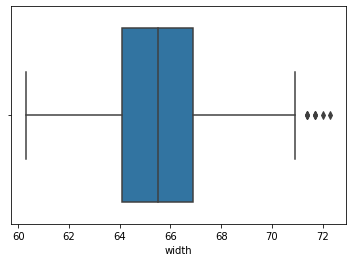

In [ ]:
 sns.boxplot(df['width'].dropna())

In [ ]:
outliers=detect_outliers_iqr(df['width'].dropna())

In [ ]:
outliers

[71.4, 71.4, 71.4, 71.7, 71.7, 71.7, 72.0, 72.3]

In [ ]:
len(outliers)

8

In [ ]:
not_outliers = df.loc[~df['width'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Width distribution without outliers')]

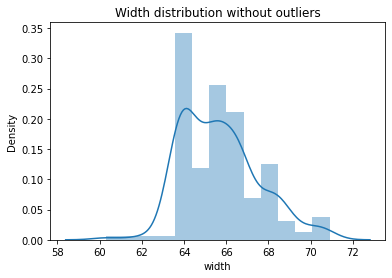

In [ ]:
sns.distplot(not_outliers['width'].dropna()).set(title='Width distribution without outliers')

This variable has 8 outliers and in the graph we can see the distribution without considering the outliers.

### height

The distribution of the variable *height* resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Height distribution')]

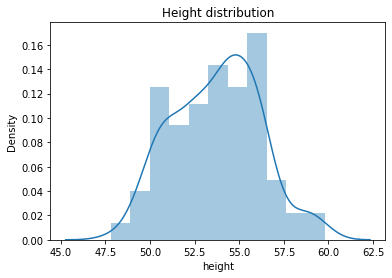

In [ ]:
 sns.distplot(df['height'].dropna()).set(title='Height distribution')

In [ ]:
outliers=detect_outliers(df['height'].dropna())
outliers

[]

In [ ]:
len(outliers)

0

According to the methodology used, this variable does not contain outliers.

### bore

The distribution of the *bore* variable resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Bore distribution')]

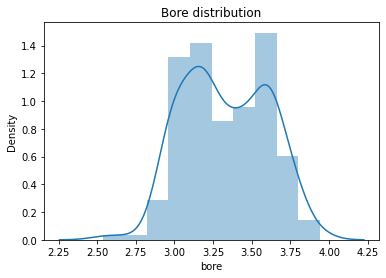

In [ ]:
 sns.distplot(df['bore'].dropna()).set(title='Bore distribution')

In [ ]:
outliers=detect_outliers(df['bore'].dropna())
outliers

[]

In [ ]:
len(outliers)

0

According to the methodology used, this variable does not contain outliers.

### stroke

The distribution of the *bore* variable resembles a **normal distribution**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Stroke distribution')]

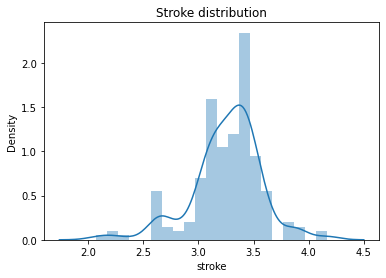

In [ ]:
 sns.distplot(df['stroke'].dropna()).set(title='Stroke distribution')

In [ ]:
outliers=detect_outliers(df['stroke'].dropna())
outliers

[2.19, 2.19, 2.07]

In [ ]:
len(outliers)

3

In [ ]:
not_outliers = df.loc[~df['stroke'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Stroke distribution without outliers')]

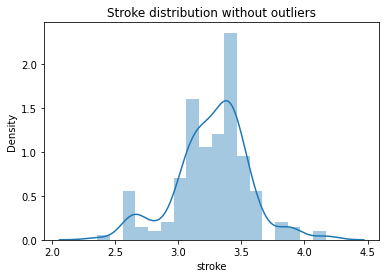

In [ ]:
sns.distplot(not_outliers['stroke'].dropna()).set(title='Stroke distribution without outliers')

This variable has 3 outliers and in the graph we can see the distribution without considering the outliers.

### compression-ratio

La distribución de la variable *compression-ratio* se asemeja a una **distribución asimétrica**.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Compression-ratio distribution')]

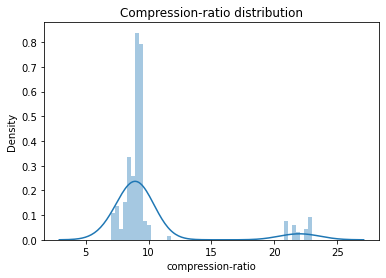

In [ ]:
sns.distplot(df['compression-ratio'].dropna()).set(title='Compression-ratio distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='compression-ratio'>

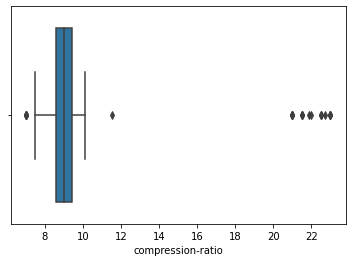

In [ ]:
sns.boxplot(df['compression-ratio'].dropna())

In [ ]:
outliers=detect_outliers_iqr(df['compression-ratio'].dropna())

In [ ]:
outliers

[7.0,
 7.0,
 11.5,
 22.7,
 22.0,
 21.5,
 21.5,
 21.5,
 21.5,
 7.0,
 7.0,
 7.0,
 21.9,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 7.0,
 7.0,
 22.5,
 22.5,
 22.5,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0]

In [ ]:
len(outliers)

28

In [ ]:
not_outliers = df.loc[~df['compression-ratio'].isin(outliers)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Compression-ratio distribution without outliers')]

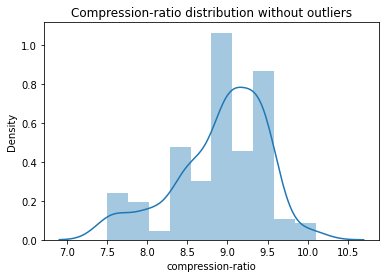

In [ ]:
sns.distplot(not_outliers['compression-ratio'].dropna()).set(title='Compression-ratio distribution without outliers')

This variable has 28 outliers and in the graph we can see the distribution without considering the outliers.

### Summary

*   symboling: 0 outliers
*   normalized-losses: 1 outliers
* curb-weight: 0 outliers
* engine-size: 10 outliers
* horsepower: 6 outliers
* peak-rpm: 2 outliers
* city-mpg: 3 outliers
* highway-mpg: 2 outliers
* price: 14 outliers
* wheel-base: 3 outliers
* length: 0 outliers
* width: 8 outliers
* height: 0 outliers
* bore: 0 outliers
* stroke: 3 outliers
* compression-ratio: 28 outliers



## Missing values analysis

### Missing values detection

Having previously converted all the variables to a data type that supports missing values will make it easier to detect them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    Float64
 10  length             205 non-null    Float64
 11  width              205 non-null    Float64
 12  height             205 non-null    Float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We can see that for the variables *normalized-losses, bore, stroke, horsepower, peak-rpm* and *price* the number of non-null values is less than the total number of records in the dataset, so we can assume that these variables contain missing values. On the other hand, the number of non-null values of all **object** type variables is equal to the total number of records, however, we must confirm if all the values of these variables are valid.

In [ ]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [ ]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
df = df.replace('?', pd.NA)

Although we could have only executed

```
df = df.replace('?', pd.NA)
```
to replace the '?' values with 'NA', I wanted to ensure that there was no other connotation for the missing values.


In [ ]:
df['num-of-doors'].unique()

array(['two', 'four', <NA>], dtype=object)

---
Once the missing values have been identified and there is homogeneity in their nomenclature (NA), we can find out how strong their presence is in each of the variables.

In [ ]:
df.isna().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64

In [ ]:
missing_values_perc = (df.isna().sum().sort_values(ascending=False) / len(df)) *100
missing_values_perc[missing_values_perc != 0]

normalized-losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak-rpm              0.97561
num-of-doors          0.97561
horsepower            0.97561
dtype: float64

[Text(0.5, 1.0, 'Missing value distribution')]

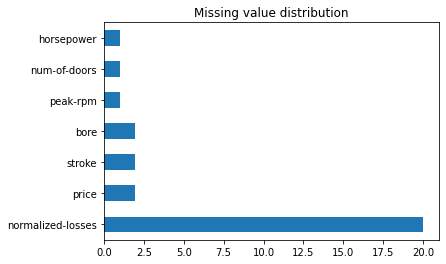

In [ ]:
missing_values_perc[missing_values_perc != 0].plot(kind='barh').set(title='Missing value distribution')

We can observe that the variable *normalize-losses* contains the most missing values with **20%**, followed by *price*, *stroke*, and *bore* with **1.95%**; and *horsepower*, *num-of-doors*, *peak-rpm* with less than **1%**.

### Methodology for filling in missing information (imputation)

To solve the problem of missing values, we must resort to a process called imputation, which consists of replacing missing values with plausible values.

Only one methodology will be used to perform the imputation, which consists of taking a random sample of the known values within a variable with missing values, this sample will be equal in size to the number of missing values of that variable, finally the values of the sample will replace the missing values. This process will be performed for each variable.

> Although there is no conclusive way to state that any imputation method will give us 100% correct data, with this method we can state that we are not including new data to the variables that could significantly modify the original distribution.

In [ ]:
na_columns = missing_values_perc[missing_values_perc != 0].index.tolist()

In [ ]:
na_columns

['normalized-losses',
 'price',
 'stroke',
 'bore',
 'peak-rpm',
 'num-of-doors',
 'horsepower']

In [ ]:
def imputer(origin, destiny):
    na_columns = destiny.columns[destiny.isna().any()].tolist()     
    for column in destiny[na_columns]:
      sample = origin[column].dropna().sample(n=destiny[column].isna().sum())
      sample.index = destiny[destiny[column].isnull()].index.tolist()
      destiny[column]=destiny[column].fillna(value = sample)
    return destiny

In [ ]:
def y_imputer(origin, destiny):    
  sample = origin.dropna().sample(n=destiny.isna().sum())
  if len(sample):
    sample.index = destiny[destiny.isnull()].index.tolist()
    destiny=destiny.fillna(value = sample)
  return destiny

Below we can see an example of how the imputation method would be applied to the complete dataset, however, it is important to clarify that the method will not be executed in this way for modeling purposes. It will be done by sampling only the values of the training set to avoid data leakage.

In [ ]:
imputer(df, df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,153,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## Interaction analysis

This section will identify the relationship of the numerical predictor variables with the response variable *price* by means of the correlation coefficient.

In [ ]:
cor = df.corr()[['price']]

<AxesSubplot:>

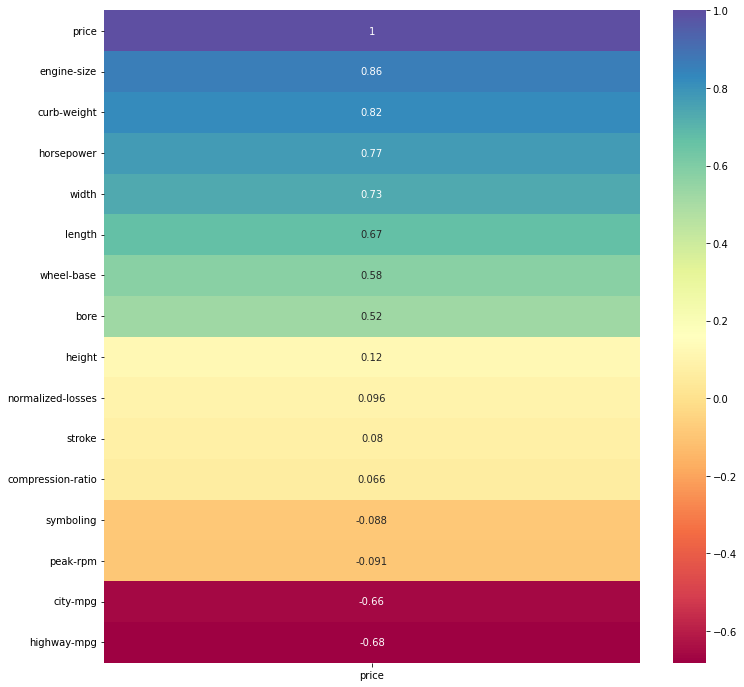

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cor.sort_values(by='price', ascending=False), annot=True, cmap = 'Spectral')

In the above graph we can observe the correlation of each of the numerical predictor variables with the response variable *price*. The variables *engine-size*, *curb-weight*, *horsepower*, *width*, *length*, *wheel-base*, *bore*, *city-mpg*, *highway-mpg* have a strong correlation with the response variable *price*. What this means is that when the *price* variable increases so do the variables with a positive correlation value. Conversely, when the *price* variable decreases, the variables with a negative correlation value increase.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

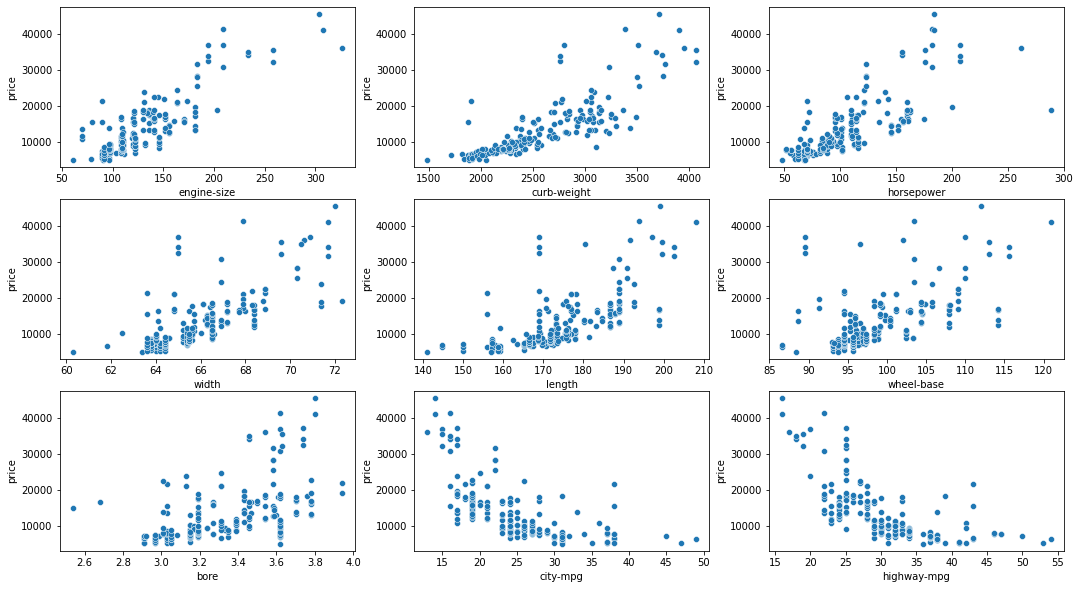

In [ ]:
fig, axs = plt.subplots(3, 3,  figsize=(18, 10))
sns.scatterplot(x=df['engine-size'], y=df['price'], ax=axs[0, 0])
sns.scatterplot(x=df['curb-weight'], y=df['price'], ax=axs[0, 1])
sns.scatterplot(x=df['horsepower'], y=df['price'], ax=axs[0, 2])
sns.scatterplot(x=df['width'], y=df['price'], ax=axs[1, 0])
sns.scatterplot(x=df['length'], y=df['price'], ax=axs[1, 1])
sns.scatterplot(x=df['wheel-base'], y=df['price'], ax=axs[1, 2])
sns.scatterplot(x=df['bore'], y=df['price'], ax=axs[2, 0])
sns.scatterplot(x=df['city-mpg'], y=df['price'], ax=axs[2, 1])
sns.scatterplot(x=df['highway-mpg'], y=df['price'], ax=axs[2, 2])

In the previous graphs we can observe that the 2 variables with the strongest correlation (*engine-size* and *curb-weight*). We can also see the negative correlation of *city-mpg* and *highway-mpg*.

<AxesSubplot:xlabel='symboling', ylabel='price'>

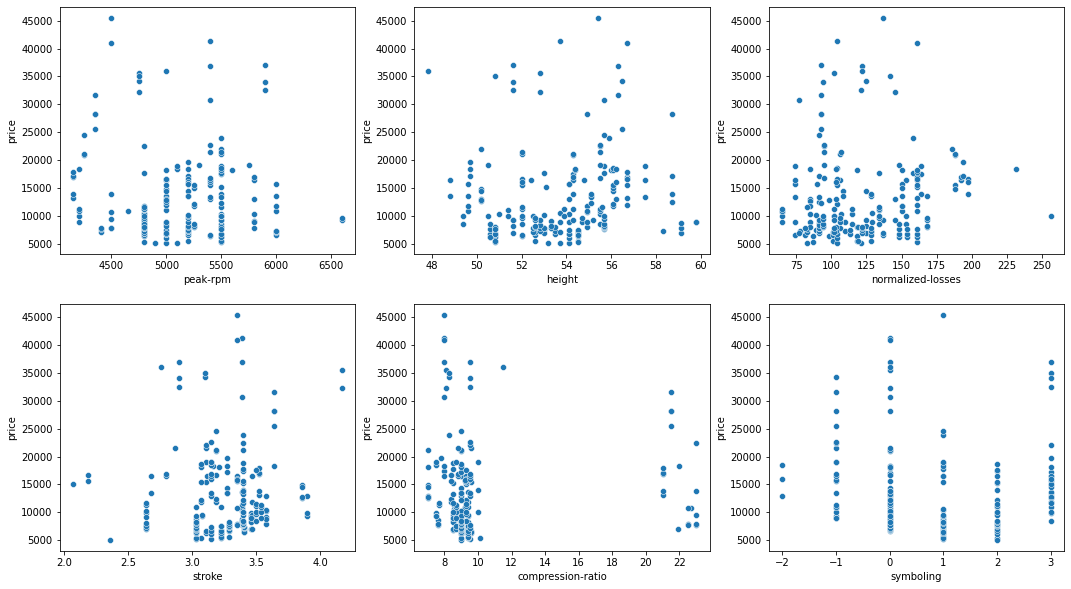

In [ ]:
fig, axs = plt.subplots(2, 3,  figsize=(18, 10))
sns.scatterplot(x=df['peak-rpm'], y=df['price'], ax=axs[0, 0])
sns.scatterplot(x=df['height'], y=df['price'], ax=axs[0, 1])
sns.scatterplot(x=df['normalized-losses'], y=df['price'], ax=axs[0, 2])
sns.scatterplot(x=df['stroke'], y=df['price'], ax=axs[1, 0])
sns.scatterplot(x=df['compression-ratio'], y=df['price'], ax=axs[1, 1])
sns.scatterplot(x=df['symboling'], y=df['price'], ax=axs[1, 2])

In the previous graphs we can observe the variables with weak correlation so that a clear trend in the points is not easily identified.

## Response variable analysis

The response variable *price* is the price of a car with the characteristics determined by the values of the other variables.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

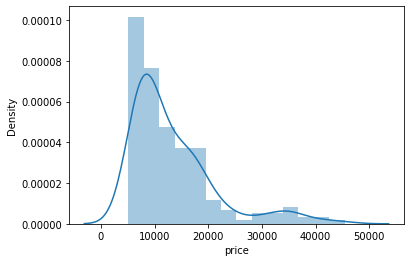

In [ ]:
sns.distplot(df['price'].dropna())

<AxesSubplot:xlabel='price', ylabel='Count'>

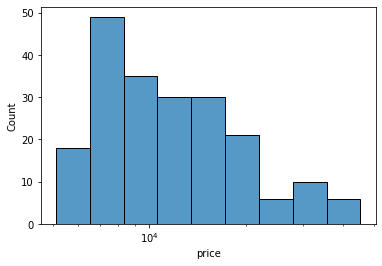

In [ ]:
sns.histplot(df['price'].dropna(), log_scale=True)

We know that *price* follows an asymmetric distribution, i.e., there are many cars with a price less than 100,000 and as the price increases the number of cars decreases.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

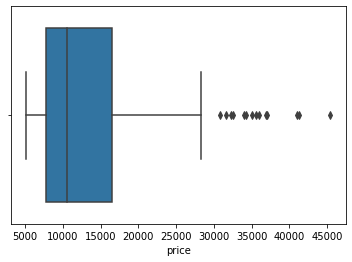

In [ ]:
sns.boxplot(df['price'].dropna())

We can also state that the price of 50% of the cars is between 7775 and 16500. In addition, there are 14 cases that we have already analyzed above, considered as ouliers, where the price exceeds 29587.5. 

In [ ]:
df['price'].describe()

count      205.000000
mean     13325.746341
std       7920.738413
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16515.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
missing_values_perc['price']

1.951219512195122

We know that there is a 1.95% presence of missing values in the variable.

<AxesSubplot:xlabel='horsepower', ylabel='price'>

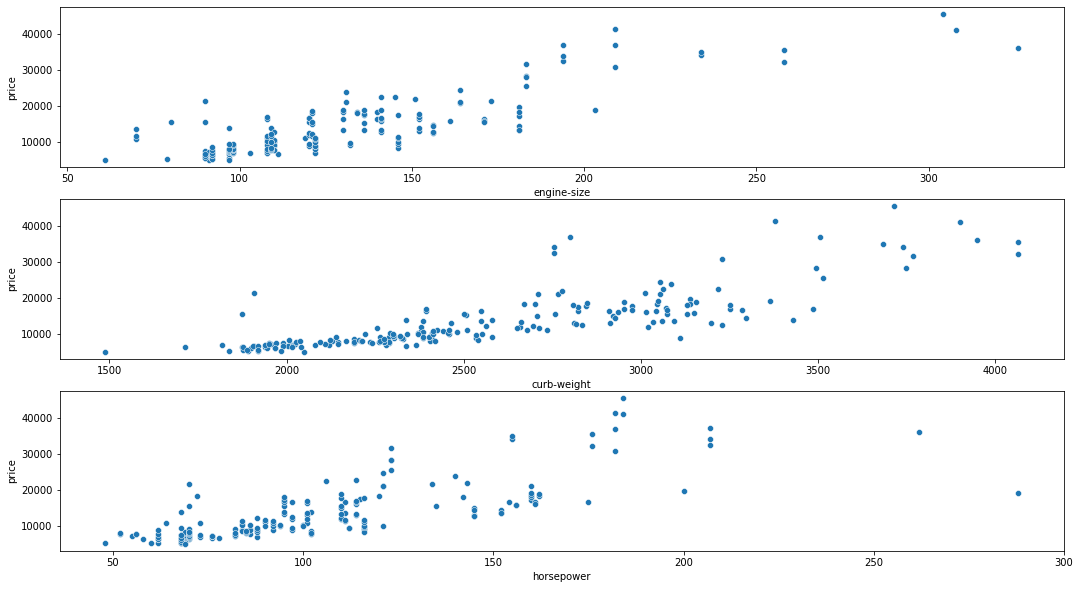

In [ ]:
fig, axs = plt.subplots(3,  figsize=(18, 10))
sns.scatterplot(x=df['engine-size'], y=df['price'], ax=axs[0])
sns.scatterplot(x=df['curb-weight'], y=df['price'], ax=axs[1])
sns.scatterplot(x=df['horsepower'], y=df['price'], ax=axs[2])

We can observe that the *engine-size*, *curb-weight* and *horsepower* variables are similarly related to the *price* variable, both in the sense of the relationship and in their strength. This makes sense, since engine size is directly related to car weight and horsepower. We can say that these variables explain the *price* variable quite well.

In [ ]:
df.groupby(["num-of-doors"])["price"].mean().sort_values(ascending=False)

num-of-doors
four    13635.140351
two     12938.153846
Name: price, dtype: Float64

In [ ]:
make_mean = df.groupby(["make"])["price"].mean().sort_values(ascending=False)
fuel_type_mean = df.groupby(["fuel-type"])["price"].mean().sort_values(ascending=False)
aspiration_mean = df.groupby(["aspiration"])["price"].mean().sort_values(ascending=False)
doors_mean = df.groupby(["num-of-doors"])["price"].mean().sort_values(ascending=False)
body_style_mean = df.groupby(["body-style"])["price"].mean().sort_values(ascending=False)
drive_wheels_mean = df.groupby(["drive-wheels"])["price"].mean().sort_values(ascending=False)
engine_location_mean = df.groupby(["engine-location"])["price"].mean().sort_values(ascending=False)
engine_type_mean = df.groupby(["engine-type"])["price"].mean().sort_values(ascending=False)
num_of_cylinders_mean = df.groupby(["num-of-cylinders"])["price"].mean().sort_values(ascending=False)
fuel_system_mean = df.groupby(["fuel-system"])["price"].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

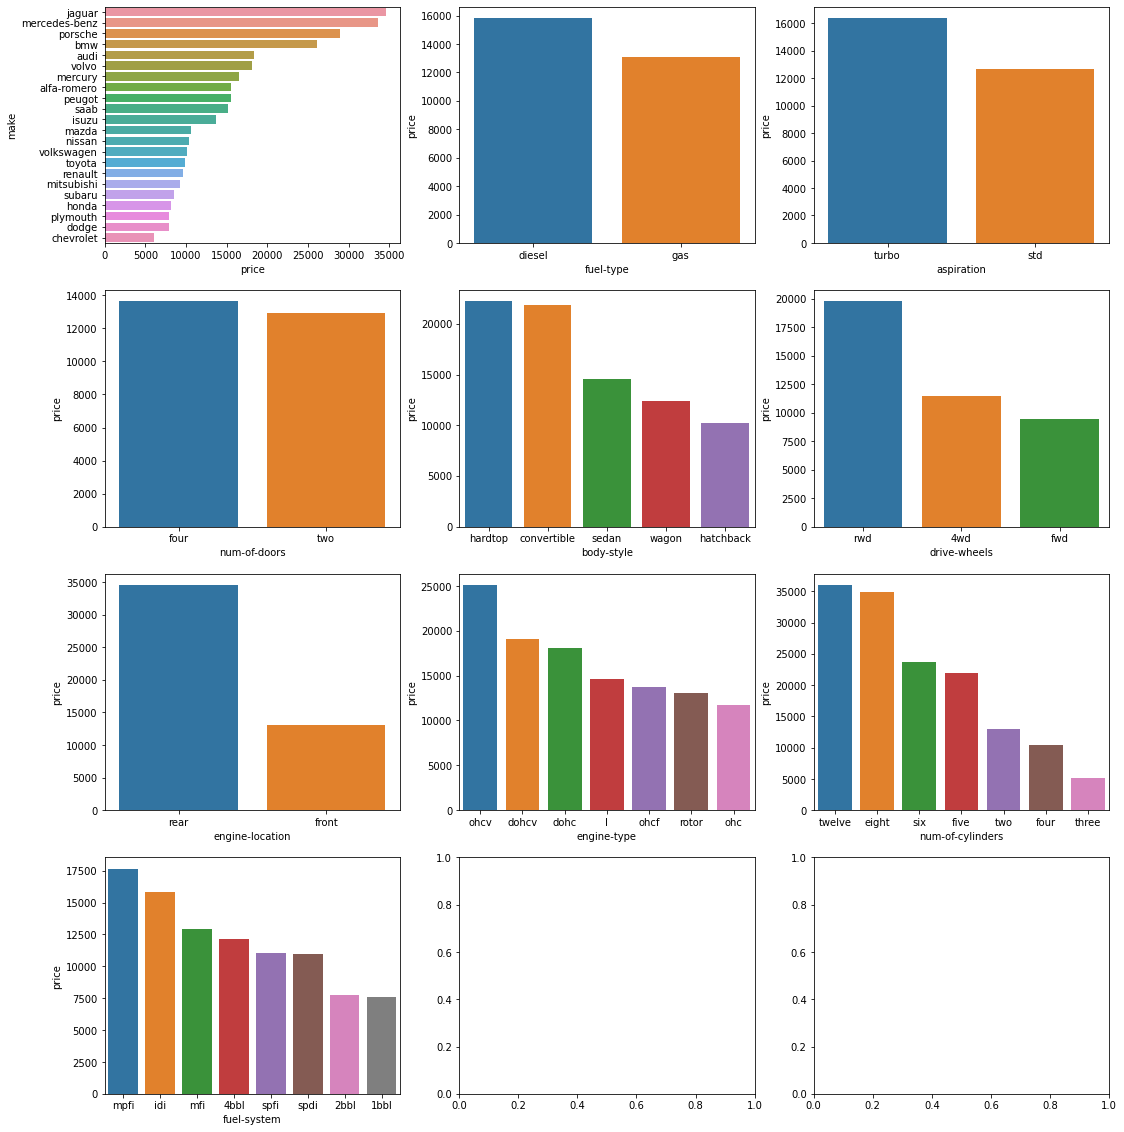

In [ ]:
fig, axs = plt.subplots(4, 3,  figsize=(18, 20))
sns.barplot(x = make_mean, y = make_mean.index, ax=axs[0, 0]) 
sns.barplot(y = fuel_type_mean, x = fuel_type_mean.index, ax=axs[0, 1]) 
sns.barplot(y = aspiration_mean,x =  aspiration_mean.index, ax=axs[0, 2]) 
sns.barplot(y = doors_mean,x =  doors_mean.index, ax=axs[1, 0]) 
sns.barplot(y = body_style_mean, x = body_style_mean.index, ax=axs[1, 1]) 
sns.barplot(y = drive_wheels_mean, x = drive_wheels_mean.index, ax=axs[1, 2]) 
sns.barplot(y = engine_location_mean, x = engine_location_mean.index, ax=axs[2, 0]) 
sns.barplot(y =engine_type_mean,x =  engine_type_mean.index, ax=axs[2, 1]) 
sns.barplot(y =num_of_cylinders_mean, x = num_of_cylinders_mean.index, ax=axs[2, 2]) 
sns.barplot(y =fuel_system_mean, x = fuel_system_mean.index, ax=axs[3, 0]) 

In the graphs we can see the average car price for each categorical variable. There are cases where the price is very similar in all categories, such is the case of *num-of-doors*. But in all other cases there are up to 3 categories that stand out for having a high price:
* *make*: jaguar, mercedez-ben and porsche
* *fuel-type*: diesel
* *aspiration*: turbo
* *body-style*: hardtop and convertible
* *drive-wheels*: rwd
* *engine-location*: rear
* *engine-type*: dohcv
* *num-of-cylinders*: eight and twelve
* *fuel-system*: mpfi and idi

### Summary



1.   The response variable *price* is the price of a car with the characteristics determined by the values of the other variables.
2.   *price* follows an asymmetric distribution, that is, there are many cars with a price less than 100,000 and as the price increases the number of cars decreases.
3. The price of 50% of the cars is between 7775 and 16500. In addition, there are 14 cases that we have already analyzed above, considered as ouliers, where the price exceeds 29587.5. 
4. There is a presence of 1.95% of missing values in the variable.
5. The *engine-size*, *curb-weight* and *horsepower* variables are similarly related to the *price* variable, both in the sense of the relationship and in its strength. This makes sense, since engine size is directly related to car weight and horsepower. We can say that these variables explain the *price* variable quite well.
6. For the categorical variables there are cases where the price is very similar in all categories, such is the case of *num-of-doors*. But in the other variables there are up to 3 categories that stand out for having a high price:
  * *make*: jaguar, mercedez-ben and, porsche.
  * *fuel-type*: diesel
  * *aspiration*: turbo
  * *body-style*: hardtop and convertible
  * *drive-wheels*: rwd
  * *engine-location*: rear
  * *engine-type*: dohcv
  * *num-of-cylinders*: eight and twelve
  * *fuel-system*: mpfi and idi


## Substitution of categorical variables

### Methodology

This section will determine the methodology for replacing categorical variables with numerical variables.

In [ ]:
object_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


As mentioned above, categorical variables are divided into 2: ordinal and nominal. 

* Ordinal variables

> Ordinal variables are those that have a specific order, in this case it is the number of doors (*num-of-doors*) and the number of cylinders (*num-of-cylinders*). This substitution will simply consist of converting text to its corresponding number.

* Nominal variables



> They are those variables that do not have a specific order, which are categories without a specific hierarchy. In this case they are: *make*, *fuel-type*, *aspiration*, *body-style*, *drive-wheels*, *engine-location*, *engine-type*, *fuel-system*. For this type of variables a frequency encoder will be used. This consists of replacing the category with its number of repetitions for that column.



In [ ]:
nominal = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

In [ ]:
categorical = list(object_df.columns.values.tolist())

In [ ]:
    num_dict = {
    'one': '1',
    'two': '2',
    'three': '3',
    'four': '4',
    'five': '5',
    'six': '6',
    'seven': '7',
    'eight': '8',
    'nine': '9',
    'zero' : '0',
    'ten' : '10',
    'eleven' : '11',
    'twelve' : '12'
    
}

In [ ]:
def categorical_encoder(origin, destiny):        
    destiny['num-of-doors'] = destiny['num-of-doors'].map(num_dict)
    destiny['num-of-cylinders'] =destiny['num-of-cylinders'].map(num_dict)
    for column in destiny[nominal]:
      dic = origin[column].value_counts().to_dict()
      destiny[column] = destiny[column].map(dic)
    return destiny

Below we can see an example of how the methodology would be applied to the complete dataset, however, it is important to clarify that the method will not be executed in this way for modeling purposes. It will be done by taking the frequency only of the values of the training set to avoid data leakage.

In [ ]:
categorical_encoder(object_df, object_df)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,185,168,2,6,76,202,12,4,94
1,3,185,168,2,6,76,202,12,4,94
2,3,185,168,2,70,76,202,13,6,94
3,7,185,168,4,96,120,202,148,4,94
4,7,185,168,4,96,9,202,148,5,94
...,...,...,...,...,...,...,...,...,...,...
200,11,185,168,4,96,76,202,148,4,94
201,11,185,37,4,96,76,202,148,4,94
202,11,185,168,4,96,76,202,13,6,94
203,11,20,37,4,96,76,202,148,6,20


### Interaction analysis of categorical variables with the response variable.

This section will identify the relationship of the categorical predictor variables with the response variable *price* by means of the correlation coefficient.

In [ ]:
object_df = object_df.join(df['price'])

In [ ]:
cor = object_df.corr()[['price']]

<AxesSubplot:>

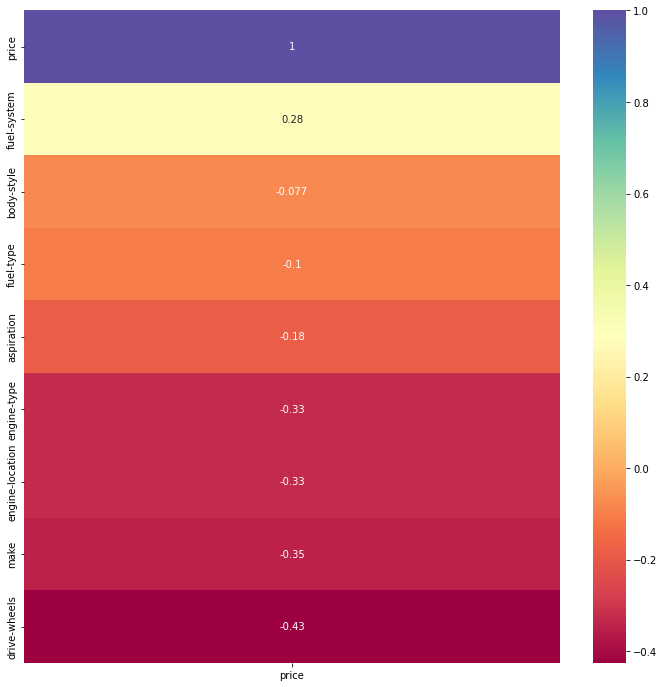

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cor.sort_values(by='price', ascending=False), annot=True, cmap = 'Spectral')

In the previous graph we can see that the correlation of the *price* variable with the categorical variables is weak, the strongest being *drive-wheels*.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

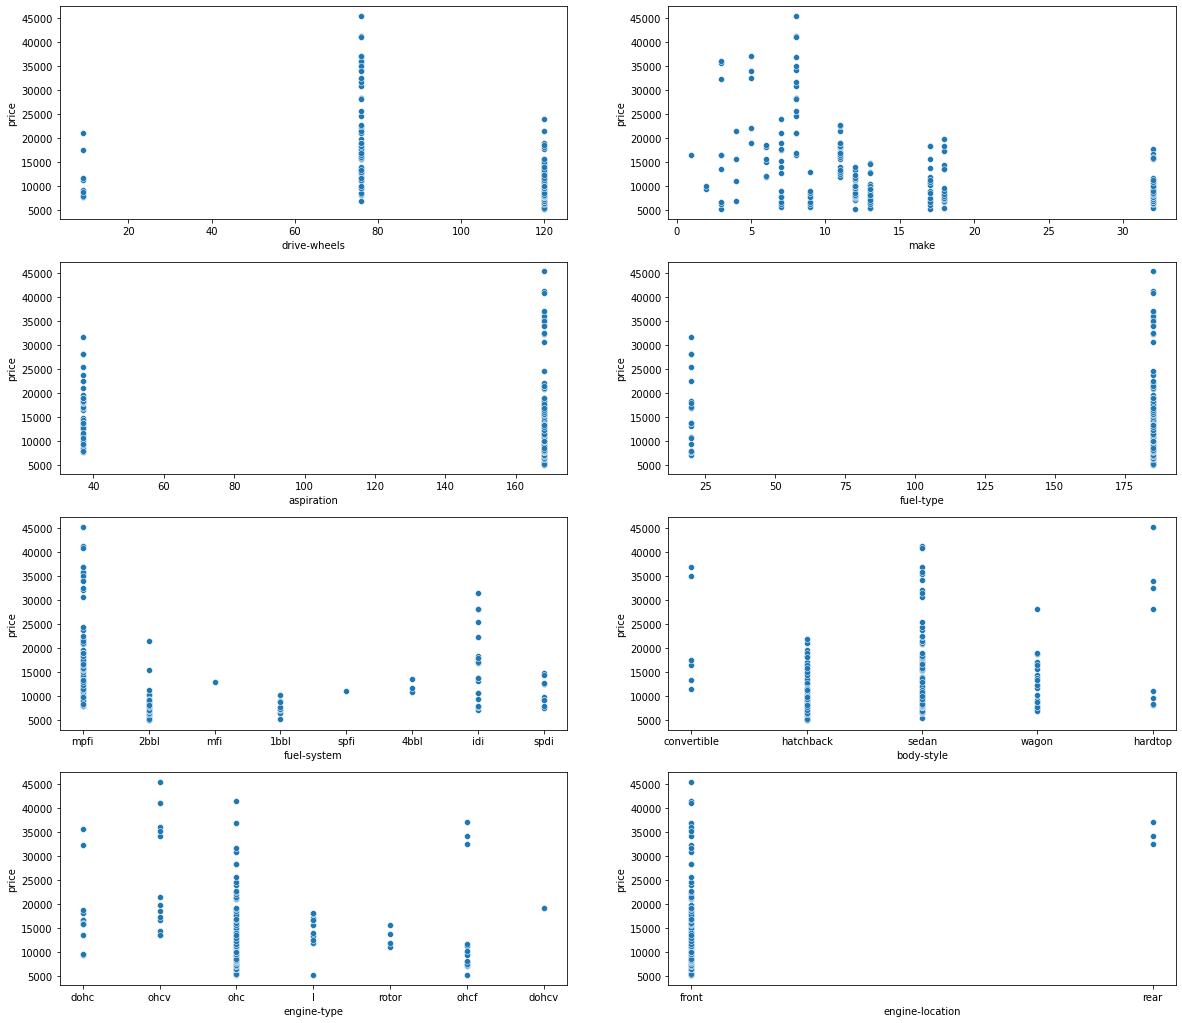

In [ ]:
fig, axs = plt.subplots(4, 2,  figsize=(20, 18))
sns.scatterplot(x=object_df['drive-wheels'], y=object_df['price'], ax=axs[0, 0])
sns.scatterplot(x=object_df['make'], y=object_df['price'], ax=axs[0, 1])
sns.scatterplot(x=object_df['aspiration'], y=object_df['price'], ax=axs[1, 0])
sns.scatterplot(x=object_df['fuel-type'], y=object_df['price'], ax=axs[1, 1])
sns.scatterplot(x=df['fuel-system'], y=df['price'], ax=axs[2, 0])
sns.scatterplot(x=df['body-style'], y=df['price'], ax=axs[2, 1])
sns.scatterplot(x=df['engine-type'], y=df['price'], ax=axs[3, 0])
sns.scatterplot(x=df['engine-location'], y=df['price'], ax=axs[3, 1])

In the above graphs we can see that there is no clear trend of the points in any of the cases.

# Modeling

In this section a Random Forest Regressor model will be applied to predict the *price* variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

First we will divide the dataset into predictors **X** and response variable *price* **y**.



In [ ]:
X = df[df.columns[~df.columns.isin(['price'])]]
y = df['price']

Subsequently we will divide **X**, **y** into training set (**train**) and test set (**test**) with a 75/25 ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .75)

To avoid data leakage, the substitution of categorical variables and missing values will be applied to the test and training sets separately, taking only the data from the training sets to apply the methodologies explained above. 

In [ ]:
X_test = categorical_encoder(X_train, X_test)

In [ ]:
X_train = categorical_encoder(X_train, X_train)

In [ ]:
X_test = imputer(X_train, X_test)

In [ ]:
X_train = imputer(X_train, X_train)

In [ ]:
y_test = y_imputer(y_train, y_test)

In [ ]:
y_train = y_imputer(y_train, y_train)

The model is created and applied and the Mean Absolute Error, Mean Absolute Percentage Error and correlation metrics are calculated to validate the prediction results.

In [ ]:
rf_model = RandomForestRegressor(random_state=1)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
test_pred = rf_model.predict(X_test)

In [ ]:
test_pred = np.array(test_pred, dtype=float)

In [ ]:
y_test = np.array(y_test, dtype=float)

In [ ]:
pred_val_mae = mean_absolute_error(y_test, test_pred)
pred_val_mape = mean_absolute_percentage_error(y_test, test_pred)
pred_val_cor = np.corrcoef(test_pred, y_test)

In [ ]:
print("Value for Mean Absolute Error para Random Forest Model: {}".format(pred_val_mae))
print("Value for Mean Absolute Percentage Error para Random Forest Model: {}".format(pred_val_mape))
print("Value for la correlación para Random Forest Model: {}".format(pred_val_cor[0,1]))

Value for Mean Absolute Error para Random Forest Model: 1496.4214391025644
Value for Mean Absolute Percentage Error para Random Forest Model: 0.1207354353547252
Value for la correlación para Random Forest Model: 0.9674829972643579
